In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

In [2]:
df = pd.read_csv("C:/Users/Shrinidhi.V/Downloads/encoded_smart_logistics_dataset.csv")
df.head()

,Timestamp,Asset_ID,Latitude,Longitude,Inventory_Level,Shipment_Status,Temperature,Humidity,Traffic_Status,Waiting_Time,User_Transaction_Amount,User_Purchase_Frequency,Logistics_Delay_Reason,Asset_Utilization,Demand_Forecast,Logistics_Delay
0,20-03-2024 00:11,Truck_7,-65.7383,11.2497,390,0,27.0,67.8,1,38,320,4,1,60.1,285,1
1,30-10-2024 07:53,Truck_6,22.2748,-131.7086,491,2,22.5,54.3,2,16,439,7,3,80.9,174,1
2,29-07-2024 18:42,Truck_10,54.9232,79.5455,190,2,25.2,62.2,1,34,355,3,1,99.2,260,0
3,28-10-2024 00:50,Truck_9,42.3900,-1.4788,330,1,25.4,52.3,2,37,227,5,2,97.4,160,1
4,27-09-2024 15:52,Truck_7,-65.8477,47.9468,480,0,20.5,57.2,0,56,197,6,1,71.6,270,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Timestamp                1000 non-null   object 
 1   Asset_ID                 1000 non-null   object 
 2   Latitude                 1000 non-null   float64
 3   Longitude                1000 non-null   float64
 4   Inventory_Level          1000 non-null   int64  
 5   Shipment_Status          1000 non-null   int64  
 6   Temperature              1000 non-null   float64
 7   Humidity                 1000 non-null   float64
 8   Traffic_Status           1000 non-null   int64  
 9   Waiting_Time             1000 non-null   int64  
 10  User_Transaction_Amount  1000 non-null   int64  
 11  User_Purchase_Frequency  1000 non-null   int64  
 12  Logistics_Delay_Reason   1000 non-null   int64  
 13  Asset_Utilization        1000 non-null   float64
 14  Demand_Forecast          

In [13]:
#Descriptive Statistics
df.describe()

,Latitude,Longitude,Inventory_Level,Shipment_Status,Temperature,Humidity,Traffic_Status,Waiting_Time,User_Transaction_Amount,User_Purchase_Frequency,Logistics_Delay_Reason,Asset_Utilization,Demand_Forecast,Logistics_Delay
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-1.360093,0.837049,297.915000,0.962000,23.893900,65.042200,0.999000,35.062000,299.055000,5.513000,1.536000,79.599100,199.284000,0.566000
std,51.997183,104.843618,113.554773,0.813153,3.322178,8.753765,0.809725,14.477768,117.787792,2.935379,1.118908,11.631153,59.920847,0.495873
min,-89.791500,-179.820200,100.000000,0.000000,18.000000,50.000000,0.000000,10.000000,100.000000,1.000000,0.000000,60.000000,100.000000,0.000000
25%,-46.167975,-88.448075,201.000000,0.000000,21.200000,57.200000,0.000000,23.000000,191.750000,3.000000,1.000000,69.475000,144.000000,0.000000
50%,-4.503150,0.678300,299.000000,1.000000,23.800000,65.200000,1.000000,35.000000,301.500000,6.000000,2.000000,79.250000,202.000000,1.000000
75%,44.502800,88.156450,399.000000,2.000000,26.600000,72.400000,2.000000,49.000000,405.000000,8.000000,3.000000,89.425000,251.250000,1.000000
max,89.870100,179.923700,500.000000,2.000000,30.000000,80.000000,2.000000,60.000000,500.000000,10.000000,3.000000,100.000000,300.000000,1.000000


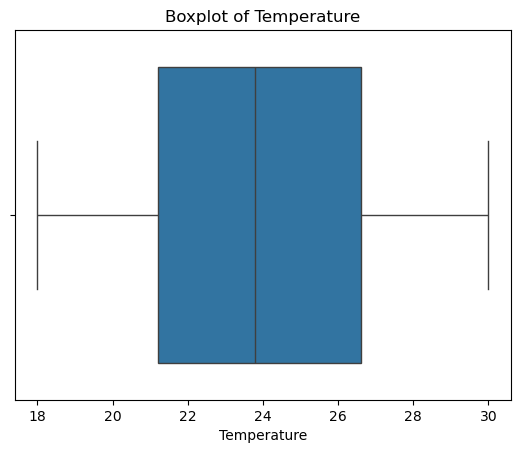

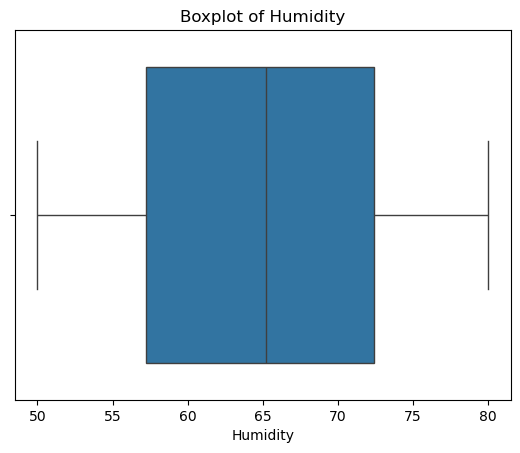

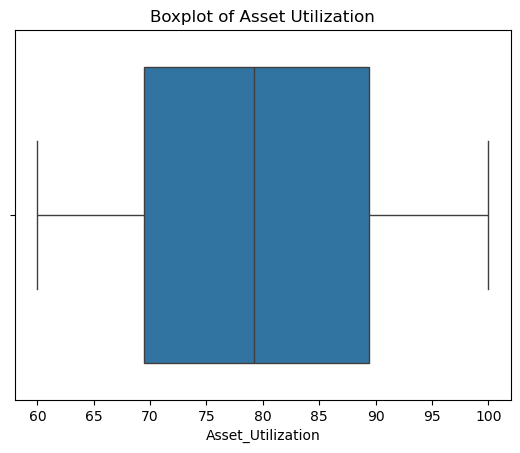

In [15]:
#Checking for Outliers
sns.boxplot(x = 'Temperature', data = df)
plt.title("Boxplot of Temperature")
plt.show()

sns.boxplot(x = 'Humidity', data = df)
plt.title("Boxplot of Humidity")
plt.show()

sns.boxplot(x = 'Asset_Utilization', data = df)
plt.title("Boxplot of Asset Utilization")
plt.show()

In [17]:
#Checking for Class Imbalance
df['Logistics_Delay'].value_counts()

Logistics_Delay
1    566
0    434
Name: count, dtype: int64

In [19]:
x = df.drop(columns = ['Timestamp', 'Asset_ID', 'Latitude',	'Longitude', 'Logistics_Delay'])
y = df['Logistics_Delay']
x

,Inventory_Level,Shipment_Status,Temperature,Humidity,Traffic_Status,Waiting_Time,User_Transaction_Amount,User_Purchase_Frequency,Logistics_Delay_Reason,Asset_Utilization,Demand_Forecast
0,390,0,27.0,67.8,1,38,320,4,1,60.1,285
1,491,2,22.5,54.3,2,16,439,7,3,80.9,174
2,190,2,25.2,62.2,1,34,355,3,1,99.2,260
3,330,1,25.4,52.3,2,37,227,5,2,97.4,160
4,480,0,20.5,57.2,0,56,197,6,1,71.6,270
...,...,...,...,...,...,...,...,...,...,...,...
995,264,1,26.9,70.0,2,32,188,1,3,79.2,213
996,479,1,23.7,77.9,1,56,276,7,3,83.7,272
997,347,2,21.0,63.1,1,35,382,5,1,74.8,275
998,276,1,18.0,64.3,2,10,361,5,1,88.6,242


In [21]:
y

0      1
1      1
2      0
3      1
4      1
      ..
995    1
996    0
997    0
998    1
999    1
Name: Logistics_Delay, Length: 1000, dtype: int64

In [23]:
#Splitting the Data
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 100, test_size = 0.25)

In [25]:
#Logistic Regression
lr = LogisticRegression(random_state = 100, max_iter = 2000)
log_model = lr.fit(x_train, y_train)
log_pred = lr.predict(x_test)

In [27]:
#Evaluation Metrics
print('Accuracy Score = ', metrics.accuracy_score(y_test,log_pred))
print('Recall Score = ', metrics.recall_score(y_test,log_pred))
print('F1 Score = ', metrics.f1_score(y_test,log_pred))
print('Precision Score = ', metrics.precision_score(y_test,log_pred))

Accuracy Score =  0.876
Recall Score =  0.9850746268656716
F1 Score =  0.8949152542372881
Precision Score =  0.8198757763975155


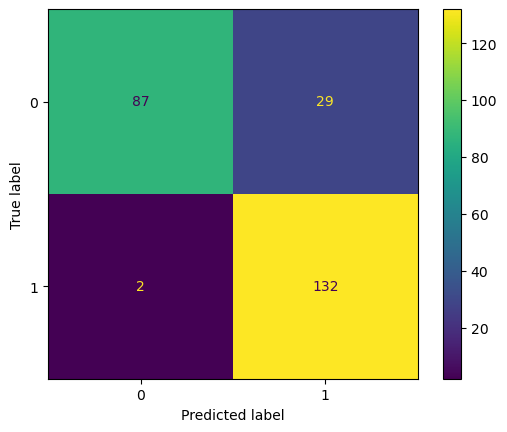

In [29]:
cm = metrics.confusion_matrix(y_test, log_pred)
Display = metrics.ConfusionMatrixDisplay(cm, display_labels = log_model.classes_)
Display.plot()

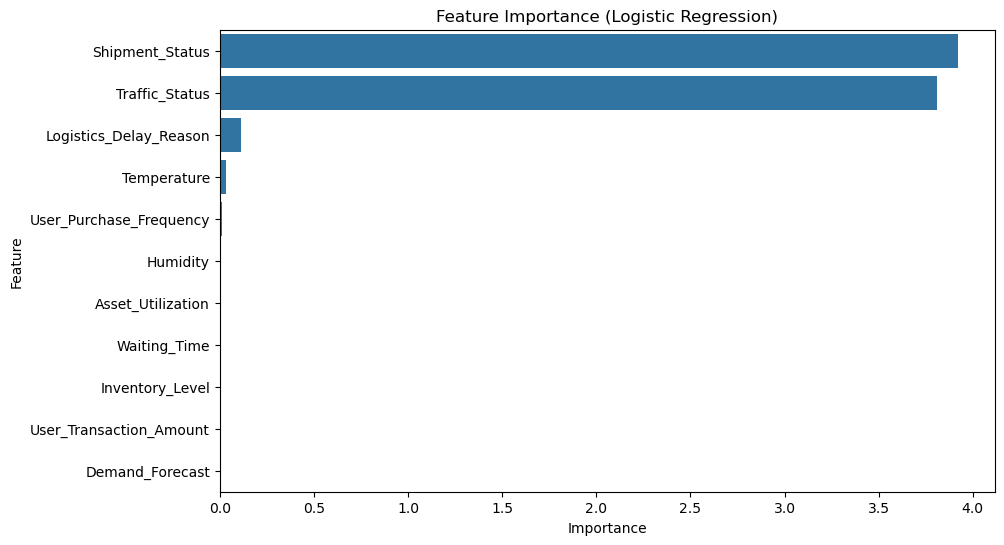

In [31]:
# Feature importance (Logistic Regression coefficients)
coefs = log_model.coef_[0]
feature_imp = pd.DataFrame({'Feature': x_train.columns, 'Importance': np.abs(coefs)}).sort_values('Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_imp)
plt.title('Feature Importance (Logistic Regression)')
plt.show()

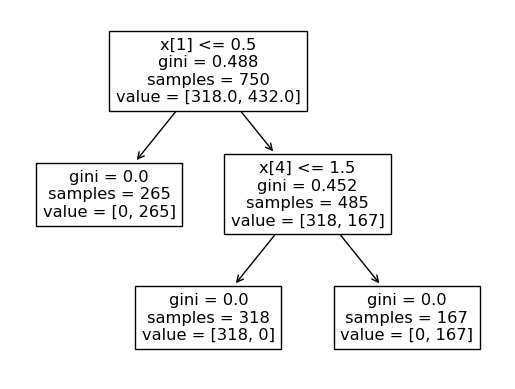

In [33]:
#Decision Tree
dt = DecisionTreeClassifier(random_state=100)
DT_model = dt.fit(x_train, y_train)
DT_pred = dt.predict(x_test)
plot_tree(DT_model)
plt.show()

In [35]:
#Evaluation Metrics
print('Accuracy Score = ', metrics.accuracy_score(y_test,DT_pred))
print('Recall Score = ', metrics.recall_score(y_test,DT_pred))
print('F1 Score = ', metrics.f1_score(y_test,DT_pred))
print('Precision Score = ', metrics.precision_score(y_test,DT_pred))

Accuracy Score =  1.0
Recall Score =  1.0
F1 Score =  1.0
Precision Score =  1.0


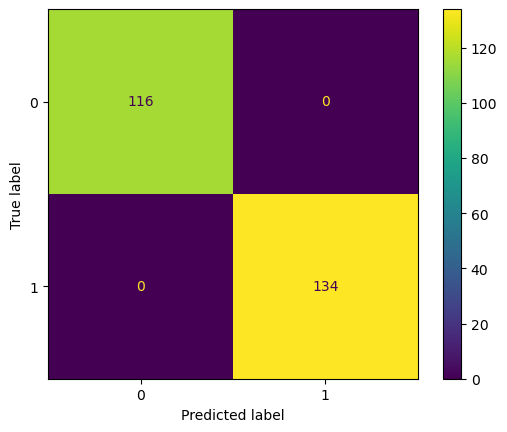

In [37]:
cm = metrics.confusion_matrix(y_test, DT_pred)
Display = metrics.ConfusionMatrixDisplay(cm, display_labels = DT_model.classes_)
Display.plot()

In [39]:
cv_params = {'n_estimators' : [50,100], 
              'max_depth' : [10,50],        
              'min_samples_leaf' : [0.5,1], 
              'min_samples_split' : [0.001, 0.01],
              'max_features' : ["sqrt"], 
              'max_samples' : [.5,.9]}

In [41]:
RFC = RandomForestClassifier(random_state = 17)

In [43]:
clf = GridSearchCV(RFC, cv_params, cv = 5, refit = "f1")

In [45]:
clf.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=17),
             param_grid={'max_depth': [10, 50], 'max_features': ['sqrt'],
                         'max_samples': [0.5, 0.9],
                         'min_samples_leaf': [0.5, 1],
                         'min_samples_split': [0.001, 0.01],
                         'n_estimators': [50, 100]},
             refit='f1')

In [47]:
RFC_pred = clf.best_estimator_.predict(x_test)

In [49]:
print('Accuracy Score = ', metrics.accuracy_score(y_test,RFC_pred))
print('Recall Score = ', metrics.recall_score(y_test,RFC_pred))
print('F1 Score = ', metrics.f1_score(y_test,RFC_pred))
print('Precision Score = ', metrics.precision_score(y_test,RFC_pred))

Accuracy Score =  1.0
Recall Score =  1.0
F1 Score =  1.0
Precision Score =  1.0


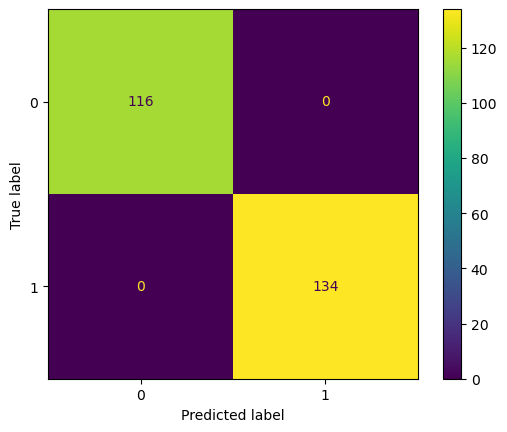

In [51]:
cm = metrics.confusion_matrix(y_test, RFC_pred)
Display = metrics.ConfusionMatrixDisplay(cm, display_labels = clf.best_estimator_.classes_)
Display.plot()

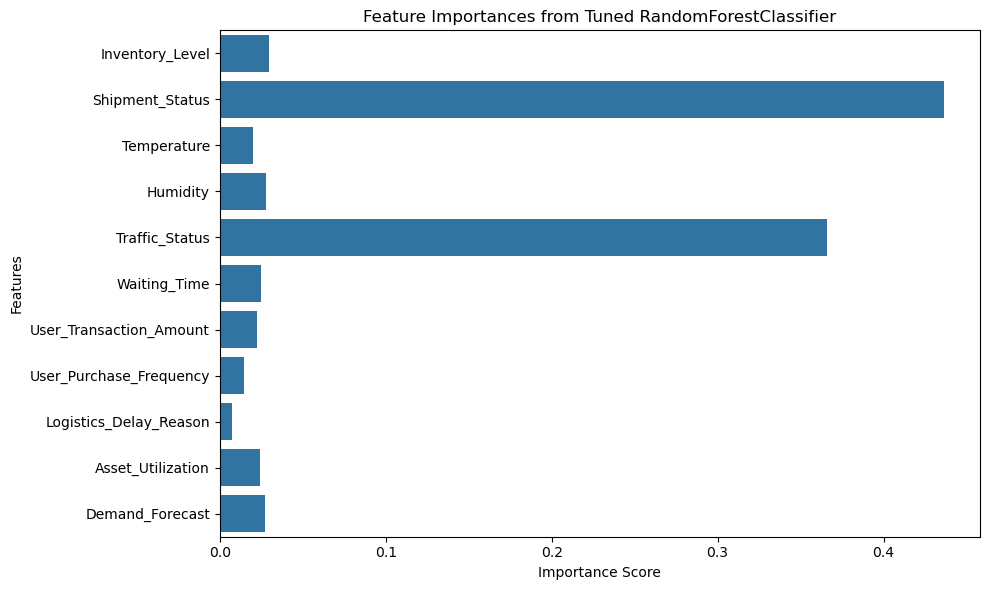

In [55]:
# Extracting feature importances from the best estimator
importances = clf.best_estimator_.feature_importances_

#Feature names
feature_names = x_train.columns  


# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importances from Tuned RandomForestClassifier")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


In [57]:
XGB = XGBClassifier()
XGB_model = XGB.fit(x_train, y_train)
XGB_pred = XGB.predict(x_test)

In [59]:
print('Accuracy Score = ', metrics.accuracy_score(y_test,XGB_pred))
print('Recall Score = ', metrics.recall_score(y_test,XGB_pred))
print('F1 Score = ', metrics.f1_score(y_test,XGB_pred))
print('Precision Score = ', metrics.precision_score(y_test,XGB_pred))

Accuracy Score =  1.0
Recall Score =  1.0
F1 Score =  1.0
Precision Score =  1.0


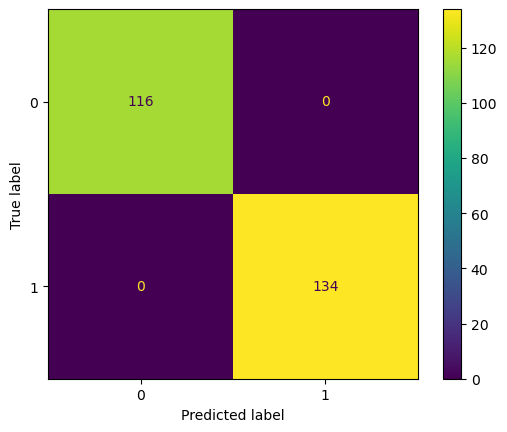

In [61]:
cm = metrics.confusion_matrix(y_test, XGB_pred)
Display = metrics.ConfusionMatrixDisplay(cm, display_labels = XGB_model.classes_)
Display.plot()

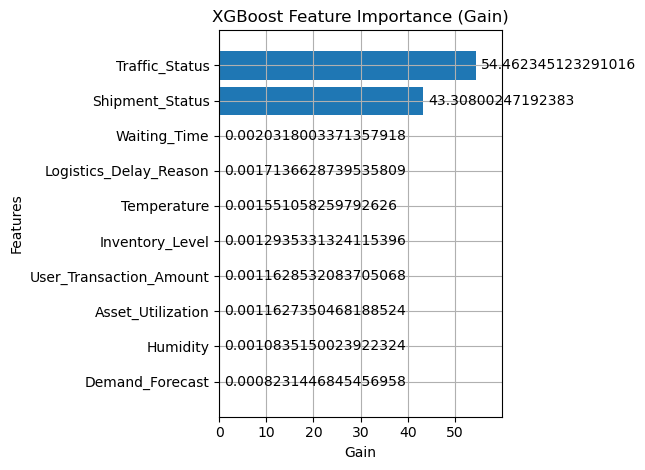

In [63]:
# Plotting feature importances
plot_importance(XGB_model, importance_type='gain', xlabel='Gain', height=0.8)
plt.title("XGBoost Feature Importance (Gain)")
plt.tight_layout()
plt.show()
